# Cab Fare Prediction

Group Members: Shriniwas Raju (211000053, CSE), 
               Sontu Akshath Rishi (211000057, CSE), 
               Vemula Jashwanth (211010256, ECE)

In [1]:
import numpy as np
import pandas as pd
from sklearn.metrics import r2_score

In [2]:
df = pd.read_csv('cab_fare.csv',na_values={'pickup_datetime':'43'})

In [3]:
df.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1.0
1,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1.0
2,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2.0
3,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1.0
4,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1.0


In [4]:
df.shape

(16067, 7)

In [5]:
df

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1.0
1,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1.0
2,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2.0
3,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1.0
4,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1.0
...,...,...,...,...,...,...,...
16062,6.5,2014-12-12 07:41:00 UTC,-74.008820,40.718757,-73.998865,40.719987,1.0
16063,16.1,2009-07-13 07:58:00 UTC,-73.981310,40.781695,-74.014392,40.715527,2.0
16064,8.5,2009-11-11 11:19:07 UTC,-73.972507,40.753417,-73.979577,40.765495,1.0
16065,8.1,2010-05-11 23:53:00 UTC,-73.957027,40.765945,-73.981983,40.779560,1.0


In [6]:
df.describe()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,16067.000000,16067.000000,16067.000000,16067.000000,16012.000000
mean,-72.462787,39.914725,-72.462328,39.897906,2.625070
std,10.578384,6.826587,10.575062,6.187087,60.844122
min,-74.438233,-74.006893,-74.429332,-74.006377,0.000000
25%,-73.992156,40.734927,-73.991182,40.734651,1.000000
50%,-73.981698,40.752603,-73.980172,40.753567,1.000000
75%,-73.966838,40.767381,-73.963642,40.768014,2.000000
max,40.766125,401.083332,40.802437,41.366138,5345.000000


# Data Preprocessing

In [7]:
df.dtypes

fare_amount           object
pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count      float64
dtype: object

In [8]:
df['fare_amount']= pd.to_numeric(df["fare_amount"],errors = "coerce")  

In [9]:
df.dtypes

fare_amount          float64
pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count      float64
dtype: object

In [10]:
df.pickup_datetime.isnull().sum()

1

In [11]:
df.dropna(subset=['pickup_datetime'])

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1.0
1,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1.0
2,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2.0
3,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1.0
4,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1.0
...,...,...,...,...,...,...,...
16062,6.5,2014-12-12 07:41:00 UTC,-74.008820,40.718757,-73.998865,40.719987,1.0
16063,16.1,2009-07-13 07:58:00 UTC,-73.981310,40.781695,-74.014392,40.715527,2.0
16064,8.5,2009-11-11 11:19:07 UTC,-73.972507,40.753417,-73.979577,40.765495,1.0
16065,8.1,2010-05-11 23:53:00 UTC,-73.957027,40.765945,-73.981983,40.779560,1.0


In [12]:
df['pickup_datetime']=pd.to_datetime(df['pickup_datetime'],format='%Y-%m-%d %H:%M:%S UTC')

In [13]:
df.dtypes

fare_amount                 float64
pickup_datetime      datetime64[ns]
pickup_longitude            float64
pickup_latitude             float64
dropoff_longitude           float64
dropoff_latitude            float64
passenger_count             float64
dtype: object

In [14]:
df['Year'] = df['pickup_datetime'].dt.year
df['Month'] = df['pickup_datetime'].dt.month
df['Date'] = df['pickup_datetime'].dt.day
df['Day'] = df['pickup_datetime'].dt.dayofweek
df['Hour'] = df['pickup_datetime'].dt.hour
df['Minute'] = df['pickup_datetime'].dt.minute

In [15]:
df.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,Year,Month,Date,Day,Hour,Minute
0,4.5,2009-06-15 17:26:21,-73.844311,40.721319,-73.841610,40.712278,1.0,2009.0,6.0,15.0,0.0,17.0,26.0
1,16.9,2010-01-05 16:52:16,-74.016048,40.711303,-73.979268,40.782004,1.0,2010.0,1.0,5.0,1.0,16.0,52.0
2,5.7,2011-08-18 00:35:00,-73.982738,40.761270,-73.991242,40.750562,2.0,2011.0,8.0,18.0,3.0,0.0,35.0
3,7.7,2012-04-21 04:30:42,-73.987130,40.733143,-73.991567,40.758092,1.0,2012.0,4.0,21.0,5.0,4.0,30.0
4,5.3,2010-03-09 07:51:00,-73.968095,40.768008,-73.956655,40.783762,1.0,2010.0,3.0,9.0,1.0,7.0,51.0


In [16]:
print(df['pickup_datetime'].isnull().sum())

1


In [17]:
df = df.drop(df[df['pickup_datetime'].isnull()].index, axis=0)
print(df.shape)
print(df['pickup_datetime'].isnull().sum())

(16066, 13)
0


In [18]:
df['passenger_count'].describe()

count    16011.000000
mean         2.625171
std         60.846021
min          0.000000
25%          1.000000
50%          1.000000
75%          2.000000
max       5345.000000
Name: passenger_count, dtype: float64

In [19]:
df = df.drop(df[df["passenger_count"]> 6 ].index, axis=0)

In [20]:
df = df.drop(df[df["passenger_count"] == 0 ].index, axis=0)

In [21]:
df["passenger_count"].sort_values(ascending= True)

8862     0.12
0        1.00
9790     1.00
9791     1.00
9792     1.00
         ... 
8076      NaN
8139      NaN
8259      NaN
8306      NaN
16066     NaN
Name: passenger_count, Length: 15989, dtype: float64

In [22]:
print(df['passenger_count'].isnull().sum())

55


In [23]:
df = df.drop(df[df['passenger_count'].isnull()].index, axis=0)
print(df.shape)
print(df['passenger_count'].isnull().sum())

(15934, 13)
0


In [24]:
df = df.drop(df[df["passenger_count"] == 0.12 ].index, axis=0)
df.shape

(15933, 13)

In [25]:
df["fare_amount"].sort_values(ascending=False)

1015    54343.0
1072     4343.0
607       453.0
980       434.0
1335      180.0
         ...   
1712        NaN
2412        NaN
2458        NaN
8178        NaN
8226        NaN
Name: fare_amount, Length: 15933, dtype: float64

In [26]:
from collections import Counter
Counter(df["fare_amount"]<0)

Counter({False: 15930, True: 3})

In [27]:
df = df.drop(df[df["fare_amount"]<0].index, axis=0)
df.shape

(15930, 13)

In [28]:
df['fare_amount'].min()

0.0

In [29]:
df = df.drop(df[df["fare_amount"]<1].index, axis=0)
df.shape

(15928, 13)

In [30]:
df = df.drop(df[df["fare_amount"]> 454 ].index, axis=0)
df.shape

(15926, 13)

In [31]:
df = df.drop(df[df['fare_amount'].isnull()].index, axis=0)
print(df.shape)
print(df['fare_amount'].isnull().sum())

(15902, 13)
0


In [32]:
df["fare_amount"].describe()

count    15902.000000
mean        11.376356
std         10.814908
min          1.140000
25%          6.000000
50%          8.500000
75%         12.500000
max        453.000000
Name: fare_amount, dtype: float64

In [33]:
df[df['pickup_latitude']<-90]
df[df['pickup_latitude']>90]

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,Year,Month,Date,Day,Hour,Minute
5686,3.3,2011-07-30 11:15:00,-73.947235,401.083332,-73.951392,40.778927,1.0,2011.0,7.0,30.0,5.0,11.0,15.0


In [34]:
df = df.drop((df[df['pickup_latitude']<-90]).index, axis=0)
df = df.drop((df[df['pickup_latitude']>90]).index, axis=0)

In [35]:
df[df['pickup_longitude']<-180]
df[df['pickup_longitude']>180]

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,Year,Month,Date,Day,Hour,Minute


In [36]:
df[df['dropoff_latitude']<-90]
df[df['dropoff_latitude']>90]

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,Year,Month,Date,Day,Hour,Minute


In [37]:
df.shape

(15901, 13)

In [38]:
df.isnull().sum()

fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
Year                 0
Month                0
Date                 0
Day                  0
Hour                 0
Minute               0
dtype: int64

In [39]:
from math import radians, cos, sin, asin, sqrt

def haversine(a):
    lon1=a[0]
    lat1=a[1]
    lon2=a[2]
    lat2=a[3]
    """
    Calculate the great circle distance between two points 
    on the earth (specified in decimal degrees)
    """
    # convert decimal degrees to radians 
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])
    
    # haversine formula 
    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c =  2 * asin(sqrt(a))
    # Radius of earth in kilometers is 6371
    km = 6371* c
    return km

In [40]:
df['distance'] = df[['pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude']].apply(haversine,axis=1)

In [41]:
df.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,Year,Month,Date,Day,Hour,Minute,distance
0,4.5,2009-06-15 17:26:21,-73.844311,40.721319,-73.841610,40.712278,1.0,2009.0,6.0,15.0,0.0,17.0,26.0,1.030764
1,16.9,2010-01-05 16:52:16,-74.016048,40.711303,-73.979268,40.782004,1.0,2010.0,1.0,5.0,1.0,16.0,52.0,8.450134
2,5.7,2011-08-18 00:35:00,-73.982738,40.761270,-73.991242,40.750562,2.0,2011.0,8.0,18.0,3.0,0.0,35.0,1.389525
3,7.7,2012-04-21 04:30:42,-73.987130,40.733143,-73.991567,40.758092,1.0,2012.0,4.0,21.0,5.0,4.0,30.0,2.799270
4,5.3,2010-03-09 07:51:00,-73.968095,40.768008,-73.956655,40.783762,1.0,2010.0,3.0,9.0,1.0,7.0,51.0,1.999157


In [42]:
df.nunique()

fare_amount            459
pickup_datetime      15856
pickup_longitude     13672
pickup_latitude      14110
dropoff_longitude    13763
dropoff_latitude     14136
passenger_count          7
Year                     7
Month                   12
Date                    31
Day                      7
Hour                    24
Minute                  60
distance             15448
dtype: int64

In [43]:
df['distance'].sort_values(ascending=False)

9147     8667.542104
8647     8667.497512
2397     8667.454421
472      8667.304968
11653    8666.701504
            ...     
8982        0.000000
7009        0.000000
4769        0.000000
3711        0.000000
12478       0.000000
Name: distance, Length: 15901, dtype: float64

In [44]:
df['distance'].nlargest(30)

9147     8667.542104
8647     8667.497512
2397     8667.454421
472      8667.304968
11653    8666.701504
13340    8666.613646
10215    8666.584706
4597     8666.566030
10458    8665.976222
10672    8665.702390
10488    8665.555634
1260     8665.268588
4278     8665.223767
6188     8664.191488
12983    8664.131808
6302     8663.039123
12705    8661.362152
14197    8657.136619
15783    8656.714168
15749    6028.926779
2280     6026.494216
5864     5420.988959
7014     4447.086698
10710     129.950482
14536     129.560455
11619     127.509261
12228     123.561157
5663      101.094619
1684       99.771579
3075       97.985088
Name: distance, dtype: float64

In [45]:
df = df.drop(df[df['distance']== 0].index, axis=0)
df.shape

(15447, 14)

In [46]:
df = df.drop(df[df['distance'] > 130 ].index, axis=0)
df.shape

(15424, 14)

In [47]:
drop = ['pickup_datetime', 'pickup_longitude', 'pickup_latitude','dropoff_longitude', 'dropoff_latitude', 'Minute']
df = df.drop(drop, axis = 1)

In [48]:
df.head()

,fare_amount,passenger_count,Year,Month,Date,Day,Hour,distance
0,4.5,1.0,2009.0,6.0,15.0,0.0,17.0,1.030764
1,16.9,1.0,2010.0,1.0,5.0,1.0,16.0,8.450134
2,5.7,2.0,2011.0,8.0,18.0,3.0,0.0,1.389525
3,7.7,1.0,2012.0,4.0,21.0,5.0,4.0,2.799270
4,5.3,1.0,2010.0,3.0,9.0,1.0,7.0,1.999157


In [49]:
df['passenger_count'] = df['passenger_count'].astype('int64')
df['Year'] = df['Year'].astype('int64')
df['Month'] = df['Month'].astype('int64')
df['Date'] = df['Date'].astype('int64')
df['Day'] = df['Day'].astype('int64')
df['Hour'] = df['Hour'].astype('int64')

In [50]:
df.dtypes

fare_amount        float64
passenger_count      int64
Year                 int64
Month                int64
Date                 int64
Day                  int64
Hour                 int64
distance           float64
dtype: object

# Data Visualization


<AxesSubplot:xlabel='distance', ylabel='fare_amount'>

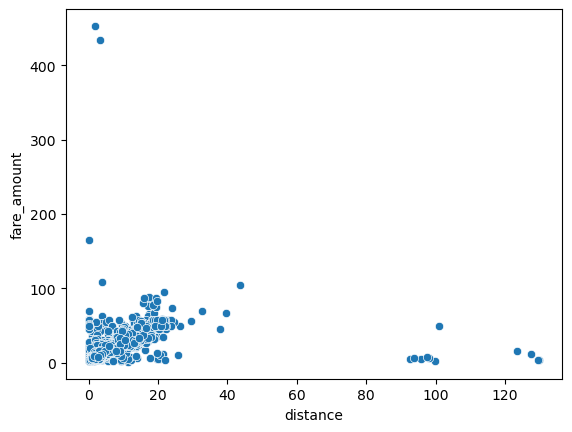

In [51]:
import seaborn as sns
sns.scatterplot(x=df['distance'],y=df['fare_amount'])

<AxesSubplot:xlabel='passenger_count', ylabel='fare_amount'>

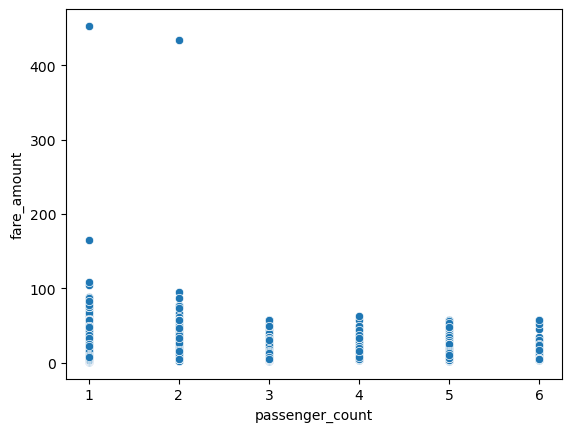

In [52]:
sns.scatterplot(x=df['passenger_count'],y=df['fare_amount'])

From the above plot we can conclude that highest Fare are coming from single and double travelling passengers.

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

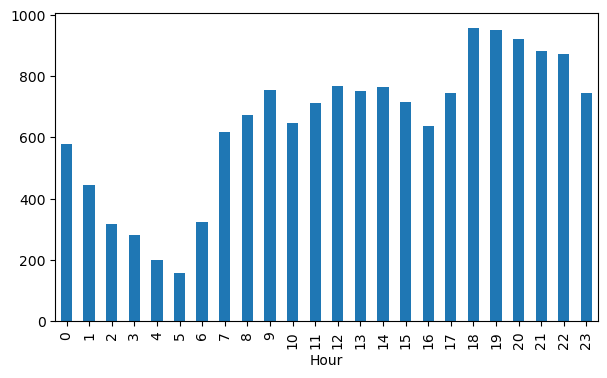

In [53]:
plt.figure(figsize=(7,4))
df.groupby(df["Hour"])['Hour'].count().plot(kind="bar")
plt.show()

Lowest cabs at 5 AM and highest at and around 7 PM i.e the office rush hours

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

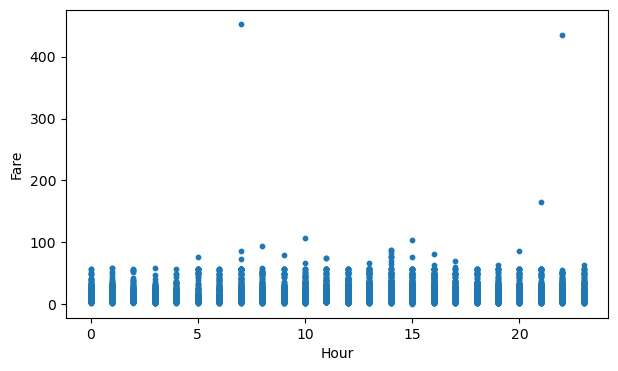

In [54]:
plt.figure(figsize=(7,4))
plt.scatter(x=df['Hour'], y=df['fare_amount'], s=10)
plt.xlabel('Hour')
plt.ylabel('Fare')
plt.show()

From the above plot We can observe that the cabs taken at 7 am and 11 Pm are the costliest. Hence we can assume that
cabs taken early in morning and late at night are costlies.

<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='Day', ylabel='count'>

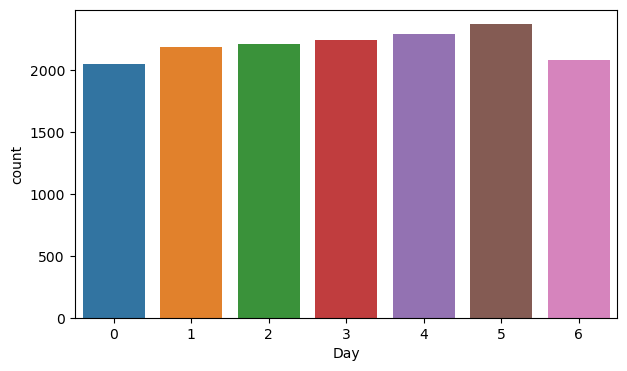

In [55]:
plt.figure(figsize=(7,4))
sns.countplot(x="Day", data=df)

The day of the week does not seem to have much influence on the number of cabs ride.

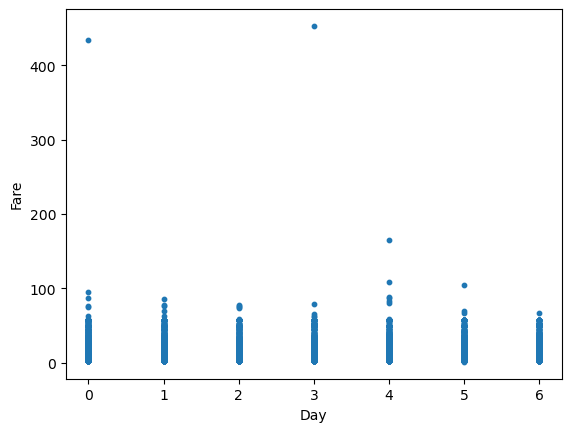

In [56]:
import matplotlib.pyplot as plt
plt.scatter(x=df['Day'], y=df['fare_amount'], s=10)
plt.xlabel('Day')
plt.ylabel('Fare')
plt.show()

The highest fares seem to be on a Sunday and Thursday, and the low on Wednesday and Saturday. May be due to low demand of the cabs on saturdays the cab fare is low and high demand of cabs on sunday and monday shows the high fare price.

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='distance', ylabel='Density'>

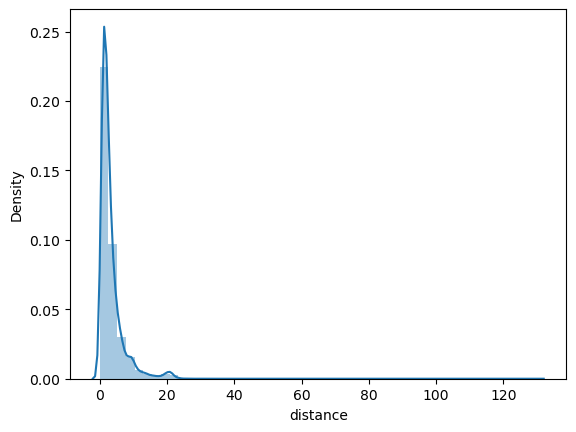

In [57]:
sns.distplot(df['distance'])

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='fare_amount', ylabel='Density'>

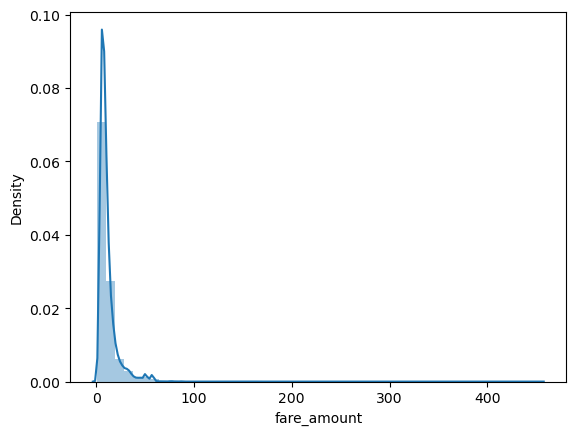

In [58]:
sns.distplot(df['fare_amount'])

In [59]:
#since skewness of target variable is high, apply log transform to reduce the skewness-
df['fare_amount'] = np.log1p(df['fare_amount'])

#since skewness of distance variable is high, apply log transform to reduce the skewness-
df['distance'] = np.log1p(df['distance'])

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='distance', ylabel='Density'>

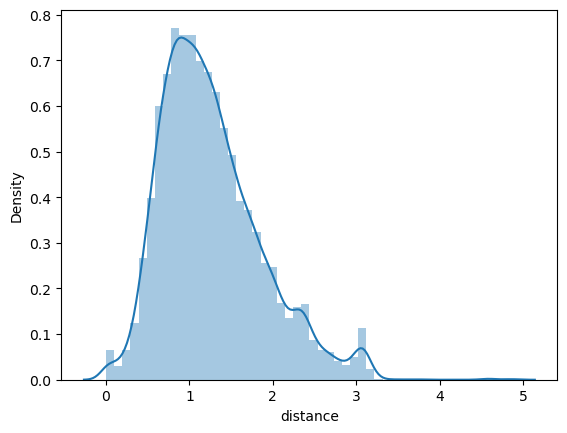

In [60]:
sns.distplot(df['distance'])

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='fare_amount', ylabel='Density'>

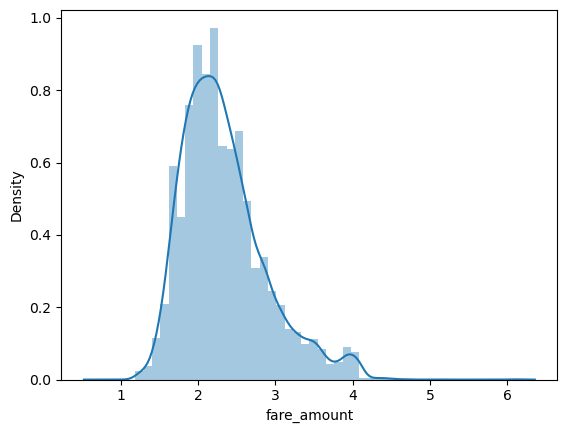

In [61]:
sns.distplot(df['fare_amount'])

# Correaltion Matrix

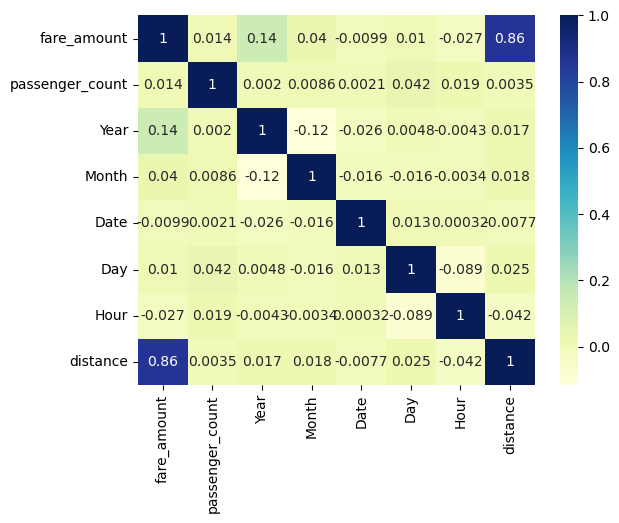

In [62]:
dataplot = sns.heatmap(df.corr(), cmap="YlGnBu", annot=True)

# Simple Linear Regression

Considering distance as input variable and fare as target variable

In [63]:
x = df.distance.values.reshape(-1, 1)
y = df.fare_amount.values.reshape(-1, 1)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=1)
regressor = LinearRegression().fit(x_train, y_train)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [64]:
y_pred_test= regressor.predict(x_test)  
y_pred_train= regressor.predict(x_train)

In [65]:
print("Intercept is : ",regressor.intercept_)
print("Coeffieient is : ",regressor.coef_)

Intercept is :  [1.36190925]
Coeffieient is :  [[0.77087852]]


In [66]:
from sklearn.metrics import mean_squared_error
print("Root mean Squared error is :",np.sqrt(mean_squared_error(y_test,y_pred_test)))

Root mean Squared error is : 0.2558318472148484


In [67]:
print("R score : ",r2_score(y_test, y_pred_test))

R score :  0.7638474817524837


Text(0.5, 1.0, ' Price VS Distance for training data ')

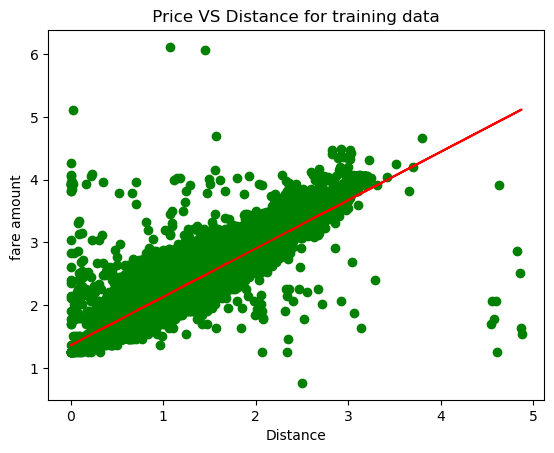

In [68]:
plt.scatter(x_train, y_train, color="green")   
plt.plot(x_train, y_pred_train, color="red")      
plt.xlabel("Distance")
plt.ylabel("fare amount ")
plt.title(" Price VS Distance for training data ")

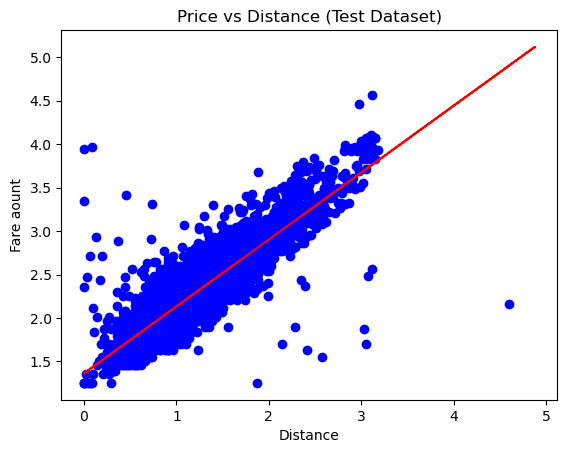

In [69]:
#visualizing the Test set results  
plt.scatter(x_test, y_test, color="blue")   
plt.plot(x_train, y_pred_train, color="red")    
plt.title("Price vs Distance (Test Dataset)")  
plt.xlabel("Distance")  
plt.ylabel("Fare aount")  
plt.show()  

# Multiple Linear regression

In [70]:
df.head()

,fare_amount,passenger_count,Year,Month,Date,Day,Hour,distance
0,1.704748,1,2009,6,15,0,17,0.708412
1,2.884801,1,2010,1,5,1,16,2.246029
2,1.902108,2,2011,8,18,3,0,0.871095
3,2.163323,1,2012,4,21,5,4,1.334809
4,1.840550,1,2010,3,9,1,7,1.098331


In [71]:
y=df.fare_amount

In [72]:
X=df.drop(['fare_amount'],axis=1)

In [73]:
X

,passenger_count,Year,Month,Date,Day,Hour,distance
0,1,2009,6,15,0,17,0.708412
1,1,2010,1,5,1,16,2.246029
2,2,2011,8,18,3,0,0.871095
3,1,2012,4,21,5,4,1.334809
4,1,2010,3,9,1,7,1.098331
...,...,...,...,...,...,...,...
16061,1,2009,5,20,2,18,1.471896
16062,1,2014,12,12,4,7,0.615210
16063,2,2009,7,13,0,7,2.182408
16064,1,2009,11,11,2,11,0.903856


In [74]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size = 0.20, random_state = 1)

<IPython.core.display.Javascript object>

In [75]:
print(X_train.shape)
print(X_test.shape)

(12339, 7)
(3085, 7)


In [76]:
from sklearn.linear_model import LinearRegression
linear_model = LinearRegression().fit(X_train,y_train)

In [77]:
y_pred_lr = linear_model.predict(X_test)

In [78]:
print("Intercept : ",linear_model.intercept_)
print("Coefficients: ",linear_model.coef_)

Intercept :  -78.44267800585465
Coefficients:  [ 3.29423462e-03  3.96460308e-02  6.45702141e-03 -3.72101698e-05
 -3.24804985e-03  1.05808795e-03  7.68620347e-01]


In [79]:

RMSE_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))

In [80]:
print("Root Mean Squared Error = "+str(RMSE_lr))

Root Mean Squared Error = 0.24540661786977663


In [81]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred_lr)

0.7827019104296612

Text(0, 0.5, 'Predicted')

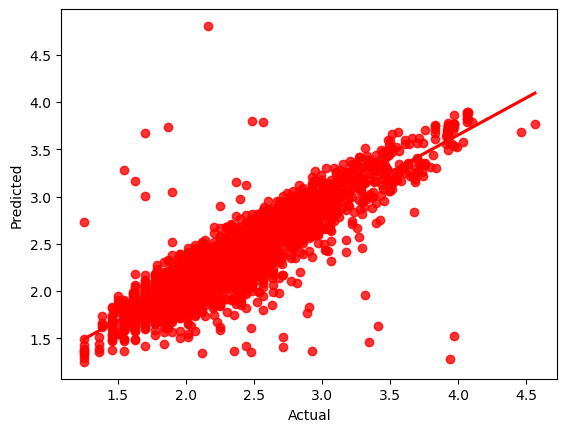

In [82]:
sns.regplot(x=y_test,y=y_pred_lr,ci=None,color ='red')
plt.xlabel('Actual')
plt.ylabel('Predicted')

# Polynomial Regression

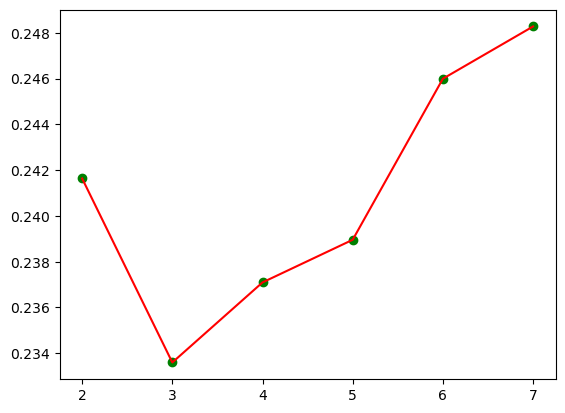

In [83]:
from sklearn.preprocessing import PolynomialFeatures
number_degrees = [2,3,4,5,6,7]
plt_mean_squared_error = []
for degree in number_degrees:

   poly_model = PolynomialFeatures(degree=degree)
   X_poly_train = poly_model.fit_transform(X_train)
   X_poly_test = poly_model.fit_transform(X_test)
   poly_model.fit(X_poly_train, y_train)
   regression_model = LinearRegression()
   regression_model.fit(X_poly_train, y_train)
   y_pred_pr = regression_model.predict(X_poly_test)
  
   plt_mean_squared_error.append(mean_squared_error(y_test, y_pred_pr, squared=False))
  
plt.scatter(number_degrees,plt_mean_squared_error, color="green")
plt.plot(number_degrees,plt_mean_squared_error, color="red") 

In [84]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree = 3)
X_poly_train = poly.fit_transform(X_train)
X_poly_test = poly.fit_transform(X_test)

In [85]:
poly.fit(X_poly_train,y_train)
regression_model = LinearRegression()
regression_model.fit(X_poly_train, y_train)
y_pred_pr = regression_model.predict(X_poly_test)

In [86]:
regression_model.intercept_

31599027.88045596

In [87]:
regression_model.coef_

array([-2.01321725e-01,  1.40224157e+03, -4.71016298e+04, -3.16463990e+03,
       -1.13011316e+02, -1.68142253e+03, -1.62748303e+02,  6.53783872e+03,
       -2.70581843e+00, -1.38371355e+00, -5.80430021e-02,  7.97230608e-02,
       -1.55922692e+00,  7.57173981e-02, -2.60885144e+00,  2.34032655e+01,
        3.14846115e+00,  1.11180694e-01,  1.66614914e+00,  1.60124257e-01,
       -6.51386920e+00, -1.78653117e-01, -1.89474718e-02, -1.22439455e-01,
        2.92827017e-02, -1.47600095e+00,  3.78241360e-03,  6.98183558e-02,
        2.35195804e-02,  1.48502253e+00,  1.74679816e+00,  1.71454409e-01,
        1.82117322e+00,  1.66468072e-01, -1.19315072e+00, -6.29839741e-01,
        7.61773948e-04,  1.34214343e-03,  3.41872762e-06, -1.21481403e-04,
       -9.79080496e-05,  2.26696505e-04, -6.32991290e-03,  3.41345258e-04,
        2.72599897e-05, -3.92763601e-05,  7.76427480e-04, -3.86031103e-05,
        1.31386389e-03,  5.13950189e-05, -3.05679755e-05, -1.22404821e-04,
        5.63594092e-05,  

In [88]:
print("Root mean square error is : ",np.sqrt(mean_squared_error(y_test,y_pred_pr)))

Root mean square error is :  0.2335959094064254


In [89]:
print("R square :",r2_score(y_test, y_pred_pr))

R square : 0.803114453876693


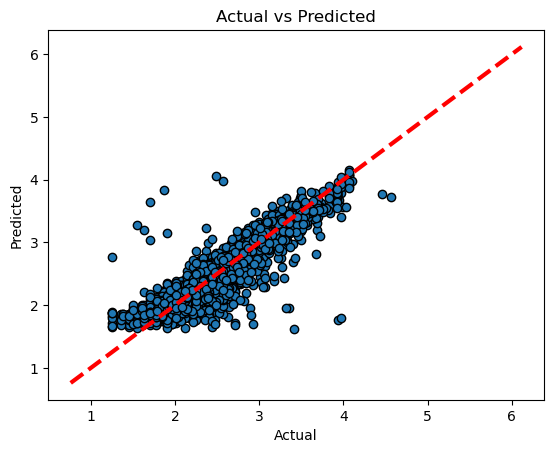

In [90]:
fig, ax = plt.subplots()
ax.scatter(y_test, y_pred_pr, edgecolors=(0, 0, 0))
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=3)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
ax.set_title('Actual vs Predicted')
plt.show()